In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pandas.tseries.offsets import DateOffset

In [2]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

# LGD

In [4]:
lgd_features =['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'purpose:car',
 'purpose:debt_consolidation',
 'purpose:educational',
 'purpose:home_improvement',
 'purpose:house',
 'purpose:major_purchase',
 'purpose:medical',
 'purpose:moving',
 'purpose:other',
 'purpose:renewable_energy',
 'purpose:small_business',
 'purpose:vacation',
 'purpose:wedding',
 'initial_list_status:w',
 'term_int',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'pub_rec',
 'total_acc',
 'total_rev_hi_lim']

In [5]:
loan_data_preprocessed_lgd = loan_data_preprocessed[lgd_features]

In [6]:
import pickle

# Replace 'file_path.pkl' with the path to your pickle file
with open('/Users/varunbhavnani/Documents/Data Science Skill up/Credit Risk Modeling Udemy/LGD/lgd_model_stage_1.sav', 'rb') as file:
    lgd_stage_1_model = pickle.load(file)


In [7]:
loan_data_preprocessed['recovery_rate_st_1'] = lgd_stage_1_model.predict(loan_data_preprocessed_lgd)

In [8]:
import pickle

# Replace 'file_path.pkl' with the path to your pickle file
with open('/Users/varunbhavnani/Documents/Data Science Skill up/Credit Risk Modeling Udemy/LGD/lgd_model_stage_2.sav', 'rb') as file:
    lgd_stage_2_model = pickle.load(file)

In [9]:
loan_data_preprocessed['recovery_rate_st_2'] = lgd_stage_2_model.predict(loan_data_preprocessed_lgd)

In [10]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1']*loan_data_preprocessed['recovery_rate_st_2']

In [11]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] <0,0,loan_data_preprocessed['recovery_rate'])

loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] >1,1,loan_data_preprocessed['recovery_rate'])

In [12]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [13]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.931015
std           0.055872
min           0.339418
25%           0.881228
50%           0.906918
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

# EAD

In [14]:
ead_features = ['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'purpose:car',
 'purpose:debt_consolidation',
 'purpose:educational',
 'purpose:home_improvement',
 'purpose:house',
 'purpose:major_purchase',
 'purpose:medical',
 'purpose:moving',
 'purpose:other',
 'purpose:renewable_energy',
 'purpose:small_business',
 'purpose:vacation',
 'purpose:wedding',
 'initial_list_status:w',
 'term_int',
 'emp_length_int',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'int_rate',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'total_rev_hi_lim']

In [15]:
loan_data_preprocessed_ead = loan_data_preprocessed[ead_features]

In [16]:
import pickle

# Replace 'file_path.pkl' with the path to your pickle file
with open('/Users/varunbhavnani/Documents/Data Science Skill up/Credit Risk Modeling Udemy/EAD/ead_model.sav', 'rb') as file:
    ead_model = pickle.load(file)


In [17]:
loan_data_preprocessed['CCF'] = ead_model.predict(loan_data_preprocessed_ead)

In [18]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] <0,0,loan_data_preprocessed['CCF'])

loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] >1,1,loan_data_preprocessed['CCF'])

In [19]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed['funded_amnt']

In [20]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10775.178852
std        6870.961106
min         208.418186
25%        5495.079681
50%        9171.541174
75%       14636.944940
max       35000.000000
Name: EAD, dtype: float64

# PD

In [21]:
loan_data_inputs_train = pd.read_csv('X_train.csv')

In [22]:
loan_data_inputs_test = pd.read_csv('X_test.csv')

In [23]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train,loan_data_inputs_test],axis=0)

In [24]:
pd_features = [
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'initial_list_status:w',
    'purpose:house_other_ren_en_med',
    'purpose:wedding_vaccation_debt',
    'purpose:home_improv_major_purchase_car_credit_card',
    'addr_state:NM_VA',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'term:36',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>140K',
    'delinq_2yrs:0',
    'delinq_2yrs:1-3',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'loan_amnt:<14K',
    'loan_amnt:14K-28K',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281'
]

In [25]:
loan_data_preprocessed_pd = loan_data_inputs_pd[pd_features]

In [26]:
import pickle

# Replace 'file_path.pkl' with the path to your pickle file
with open('/Users/varunbhavnani/Documents/Data Science Skill up/Credit Risk Modeling Udemy/PD Model/model.pkl', 'rb') as file:
    pd_model = pickle.load(file)

In [27]:
loan_data_inputs_pd['PD'] = pd_model.predict_proba(loan_data_preprocessed_pd)[:][:,0]

In [28]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.109070
std           0.070054
min           0.007015
25%           0.056735
50%           0.093715
75%           0.145526
max           0.633728
Name: PD, dtype: float64

In [29]:
loan_data_preprocessed.shape

(466285, 215)

In [30]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.931015
std           0.055872
min           0.339418
25%           0.881228
50%           0.906918
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [31]:
loan_data_inputs_pd.shape

(466285, 108)

# Expected Loss

In [32]:
# Reset the index for each DataFrame to ensure they have unique indices
loan_data_preprocessed = loan_data_preprocessed.reset_index(drop=True)
loan_data_inputs_pd = loan_data_inputs_pd.reset_index(drop=True)

# Concatenate along the columns
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis=1)

In [33]:
loan_data_preprocessed_new['EL'] =loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [34]:
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean       1095.504725
std        1095.609829
min           5.222995
25%         365.801940
50%         746.132465
75%        1438.860581
max       18990.674971
Name: EL, dtype: float64

In [35]:
loan_data_preprocessed_new['EL'].sum()

510817420.6280285

In [36]:
loan_data_preprocessed_new['EL'].sum()/loan_data_preprocessed_new['funded_amnt'].sum()

0.07665267109775352

# Expected Loss Forecast

In [37]:
print(loan_data_preprocessed_new.shape)
loan_data_preprocessed_new.head()

(466285, 324)


,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,loan_amnt:<14K,loan_amnt:14K-28K,loan_amnt>28K,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,PD,EL
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,1,0,0,1,0,0,0,0.053123,143.381462
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,1,0,0,0,0,0,1,0,0.158314,295.041035
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,1,0,0,0,1,0,0,0.140341,201.184844
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,1,0,0,1,0,0,0,0,0.057317,330.911089
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,1,0,0,0,1,0,0,0,0.045201,88.984436


In [38]:
pd.options.display.max_rows = None

loan_data_preprocessed_new.dtypes

Unnamed: 0.1                                                         int64
Unnamed: 0                                                           int64
id                                                                   int64
member_id                                                            int64
loan_amnt                                                            int64
funded_amnt                                                          int64
funded_amnt_inv                                                    float64
term                                                                object
int_rate                                                           float64
installment                                                        float64
grade                                                               object
sub_grade                                                           object
emp_title                                                           object
emp_length               

In [39]:
loan_data_preprocessed_new['issue_d_date'].value_counts(dropna= False)

2014-10-01    38782
2014-07-01    29306
2014-11-01    25054
2014-05-01    19099
2014-04-01    19071
2014-08-01    18814
2014-06-01    17179
2014-03-01    16513
2014-01-01    15628
2014-02-01    15269
2013-12-01    15020
2013-11-01    14676
2013-10-01    14114
2013-09-01    12987
2013-08-01    12674
2013-07-01    11910
2013-06-01    10899
2014-09-01    10606
2013-05-01    10350
2014-12-01    10307
2013-04-01     9419
2013-03-01     8273
2013-02-01     7561
2013-01-01     6872
2012-11-01     6382
2012-10-01     6263
2012-09-01     6087
2012-12-01     6066
2012-08-01     5419
2012-07-01     4627
2012-06-01     3817
2012-05-01     3400
2012-04-01     3230
2012-03-01     2914
2012-01-01     2602
2012-02-01     2560
2011-12-01     2267
2011-11-01     2232
2011-10-01     2118
2011-09-01     2067
2011-08-01     1934
2011-07-01     1875
2011-06-01     1835
2011-05-01     1704
2011-04-01     1563
2011-03-01     1448
2011-01-01     1380
2010-12-01     1335
2011-02-01     1298
2010-10-01     1232


In [40]:
time_series_data = loan_data_preprocessed_new[['issue_d_date','EL']]

In [41]:
print(time_series_data.shape)
time_series_data.head()

(466285, 2)


,issue_d_date,EL
0,2011-12-01,143.381462
1,2011-12-01,295.041035
2,2011-12-01,201.184844
3,2011-12-01,330.911089
4,2011-12-01,88.984436


In [42]:
time_series_data.dtypes

issue_d_date     object
EL              float64
dtype: object

In [43]:
time_series_data['issue_d_date'] = pd.to_datetime(time_series_data['issue_d_date'])

In [44]:
time_series_data.set_index('issue_d_date', inplace= True)

In [45]:
time_series_data.head()

,EL
issue_d_date,
2011-12-01,143.381462
2011-12-01,295.041035
2011-12-01,201.184844
2011-12-01,330.911089
2011-12-01,88.984436


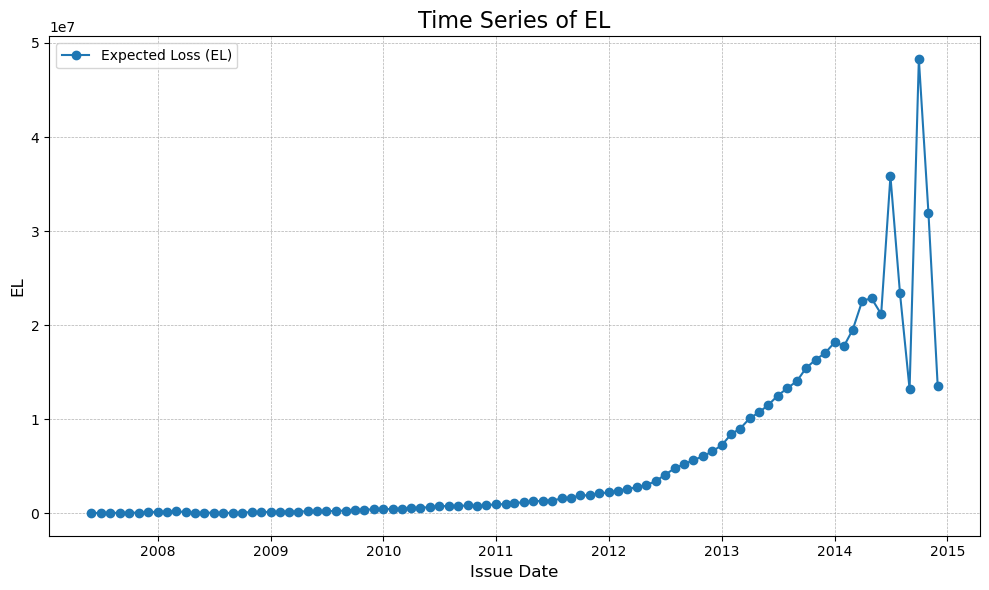

In [46]:
# Aggregate by date (e.g., sum, mean, etc.)
df_grouped = time_series_data.groupby(time_series_data.index).sum()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['EL'], marker='o', label='Expected Loss (EL)')
plt.title('Time Series of EL', fontsize=16)
plt.xlabel('Issue Date', fontsize=12)
plt.ylabel('EL', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [76]:
trend_df = time_series_data.groupby('issue_d_date')['EL'].sum().reset_index(name='Expected Loss')

In [77]:
trend_df

,issue_d_date,Expected Loss
0,2007-06-01,4.881262e+03
1,2007-07-01,1.633843e+04
2,2007-08-01,2.917348e+04
3,2007-09-01,1.587953e+04
4,2007-10-01,3.429688e+04
5,2007-11-01,4.934025e+04
6,2007-12-01,9.059975e+04
7,2008-01-01,1.424751e+05
8,2008-02-01,1.420155e+05
9,2008-03-01,2.024224e+05


In [78]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [79]:
adfuller_test(trend_df['Expected Loss'])

ADF Test Statistic : 1.942172678555534
p-value : 0.998592929096637
#Lags Used : 11
Number of Observations Used : 79
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [81]:
trend_df['First Differencing'] = trend_df['Expected Loss'] - trend_df['Expected Loss'].shift(1)

In [82]:
trend_df.head()

,issue_d_date,Expected Loss,First Differencing
0,2007-06-01,4881.262027,NaN
1,2007-07-01,16338.434125,11457.172098
2,2007-08-01,29173.475308,12835.041184
3,2007-09-01,15879.531388,-13293.943920
4,2007-10-01,34296.883616,18417.352227


In [84]:
adfuller_test(trend_df['First Differencing'].dropna())

ADF Test Statistic : 2.8114426196277944
p-value : 1.0
#Lags Used : 11
Number of Observations Used : 78
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [85]:
trend_df['Second Differencing'] = trend_df['First Differencing'] - trend_df['First Differencing'].shift(1)

In [86]:
adfuller_test(trend_df['Second Differencing'].dropna())

ADF Test Statistic : -0.3650729037170338
p-value : 0.9157690570095738
#Lags Used : 12
Number of Observations Used : 76
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


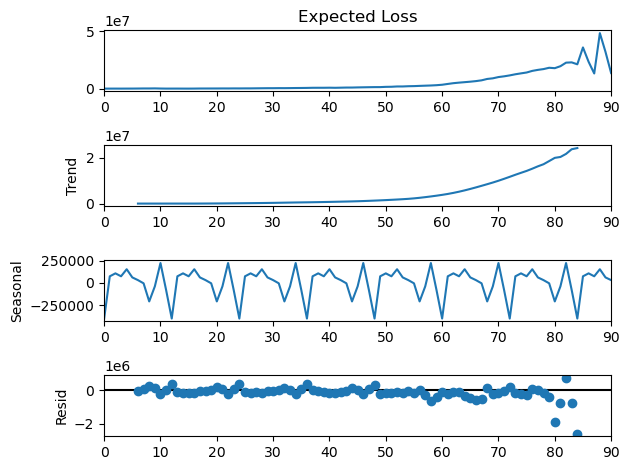

In [87]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(trend_df['Expected Loss'], model="additive", period=12)  # Assuming monthly data (period=12)

# Plot the decomposed components
decomposition.plot()
plt.show()


Seasonal Decomposition (Second Plot)

- Observed Component (Top):
    The original Expected Loss series shows a clear upward trend, with sharp spikes and dips near the end.
- Trend Component (Second Panel):
    There is a strong, steady upward trend over time. This aligns with the structural breakpoints detected, as the trend changes significantly near the breakpoints.
- Seasonal Component (Third Panel):
    The series shows clear periodic fluctuations, indicating seasonality. The magnitude of the seasonal effect appears constant over time, meaning it doesn't amplify as the trend grows.
- Residual Component (Bottom Panel):
    The residuals seem relatively stable initially but become larger and more erratic toward the end of the series, suggesting increased uncertainty or noise in the latter part of the data.

In [88]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.5/489.5 kB 6.6 MB/s eta 0:00:00a 0:00:01


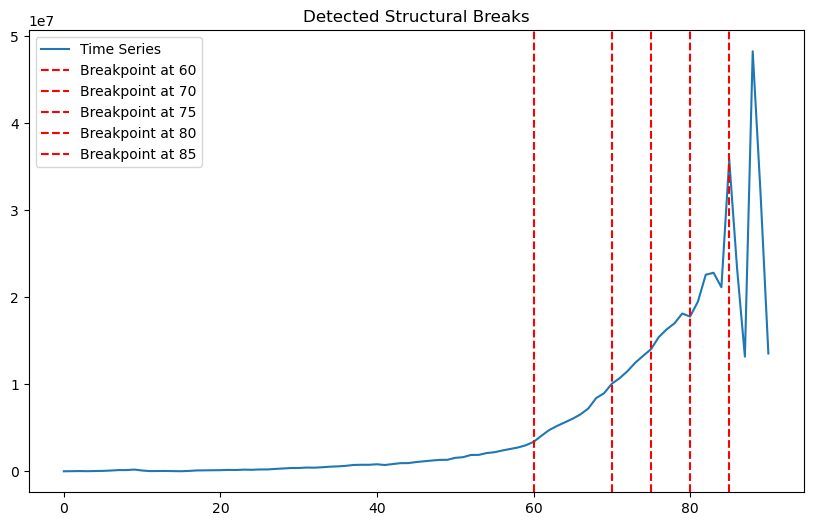

In [90]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# Convert the series to a 2D array
signal = trend_df['Expected Loss'].dropna().values.reshape(-1, 1)

# Detecting structural breaks using 'ruptures'
algo = rpt.Binseg(model="l2").fit(signal)
breakpoints = algo.predict(n_bkps=5)  # Number of breaks to detect

# Plot the detected breakpoints
plt.figure(figsize=(10, 6))
plt.plot(trend_df['Expected Loss'], label="Time Series")
for bp in breakpoints[:-1]:  # Exclude the last breakpoint as it's the end
    plt.axvline(trend_df.index[bp], color="red", linestyle="--", label=f"Breakpoint at {trend_df.index[bp]}")
plt.title("Detected Structural Breaks")
plt.legend()
plt.show()

Structural Breaks Detection (First Plot)

- Breakpoints Detected:
    - The red dashed lines show five structural breakpoints at indices 60, 70, 75, 80, and 85.
    - These breaks may indicate abrupt changes in the trend or variance of the time series, possibly due to external events, policy changes, or shifts in business operations.
- Observations:
    - Most breakpoints occur in the later portion of the time series, coinciding with the steep increase in Expected Loss.
    - This suggests a possible structural change in the underlying process driving the expected losses during that time